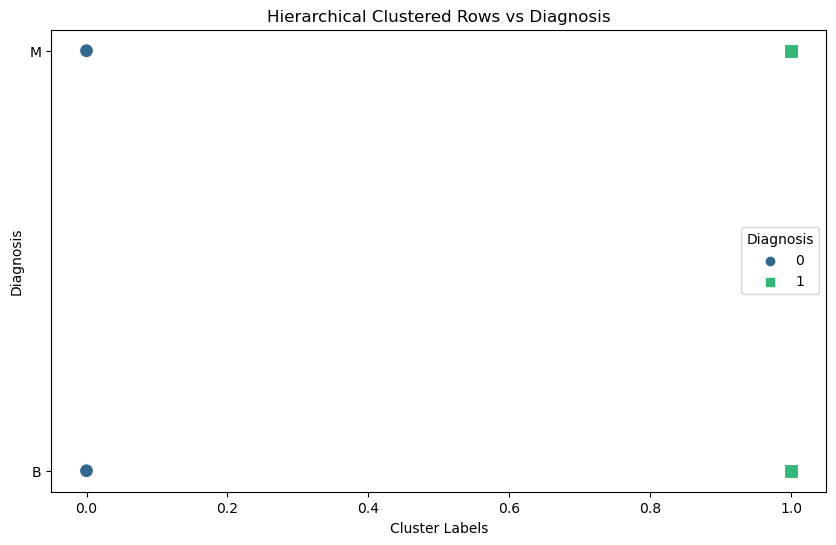

Hierarchical Clustering Results:
Cluster Labels  Diagnosis
0               B             24
                M            170
1               B            333
                M             42
dtype: int64

Additional Evaluations for Hierarchical Clustering:
Silhouette Score: 0.32512633539907987
Adjusted Rand Index: 0.5865167068167211
Homogeneity Score: 0.45675199143927475
Completeness Score: 0.47002994738167264
V-measure Score: 0.463295853123339


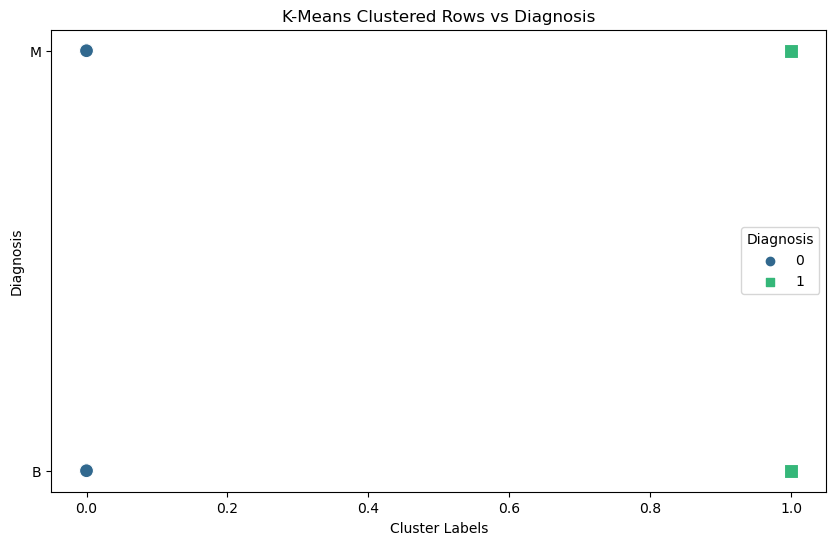


K-Means Clustering Results:
Cluster Labels  Diagnosis
0               B             14
                M            175
1               B            343
                M             37
dtype: int64

Additional Evaluations for K-Means Clustering:
Silhouette Score: 0.338468928397617
Adjusted Rand Index: 0.6707206476880808
Homogeneity Score: 0.544273910209196
Completeness Score: 0.5653508768266774
V-measure Score: 0.5546122184105559


In [5]:


import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "D:/Stevens/KDD/wisc_bc_ContinuousVar.csv"
data = pd.read_csv(file_path)

# Drop rows with missing values
data.dropna(inplace=True)

# Extract features (excluding 'diagnosis')
X = data.drop('diagnosis', axis=1)

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Function to plot clustered rows against the diagnosis column with a different style
def plot_cluster_vs_diagnosis(cluster_labels, diagnosis_column, method_name):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=cluster_labels, y=diagnosis_column, hue=cluster_labels, palette='viridis', s=100, style=cluster_labels, markers=['o', 's'])
    plt.title(f"{method_name} Clustered Rows vs Diagnosis")
    plt.xlabel("Cluster Labels")
    plt.ylabel("Diagnosis")
    plt.legend(title="Diagnosis")
    plt.show()

# 9.1 Hierarchical Clustering (hclust)
hclust = AgglomerativeClustering(n_clusters=2)
hclust_labels = hclust.fit_predict(X_std)

# Plot hierarchical clustering results with a different style
plot_cluster_vs_diagnosis(hclust_labels, data['diagnosis'], "Hierarchical")

# Tabulate the clustered rows against the diagnosis column
hclust_results = pd.DataFrame({'Cluster Labels': hclust_labels, 'Diagnosis': data['diagnosis']})
print("Hierarchical Clustering Results:")
print(hclust_results.groupby(['Cluster Labels', 'Diagnosis']).size())

# Additional Evaluations for Hierarchical Clustering
silhouette_hclust = silhouette_score(X_std, hclust_labels)
ari_hclust = adjusted_rand_score(data['diagnosis'], hclust_labels)
homogeneity_hclust = homogeneity_score(data['diagnosis'], hclust_labels)
completeness_hclust = completeness_score(data['diagnosis'], hclust_labels)
v_measure_hclust = v_measure_score(data['diagnosis'], hclust_labels)

print("\nAdditional Evaluations for Hierarchical Clustering:")
print("Silhouette Score:", silhouette_hclust)
print("Adjusted Rand Index:", ari_hclust)
print("Homogeneity Score:", homogeneity_hclust)
print("Completeness Score:", completeness_hclust)
print("V-measure Score:", v_measure_hclust)

# 9.2 K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_std)

# Plot k-means clustering results with a different style
plot_cluster_vs_diagnosis(kmeans_labels, data['diagnosis'], "K-Means")

# Tabulate the clustered rows against the diagnosis column
kmeans_results = pd.DataFrame({'Cluster Labels': kmeans_labels, 'Diagnosis': data['diagnosis']})
print("\nK-Means Clustering Results:")
print(kmeans_results.groupby(['Cluster Labels', 'Diagnosis']).size())

# Additional Evaluations for K-Means Clustering
silhouette_kmeans = silhouette_score(X_std, kmeans_labels)
ari_kmeans = adjusted_rand_score(data['diagnosis'], kmeans_labels)
homogeneity_kmeans = homogeneity_score(data['diagnosis'], kmeans_labels)
completeness_kmeans = completeness_score(data['diagnosis'], kmeans_labels)
v_measure_kmeans = v_measure_score(data['diagnosis'], kmeans_labels)

print("\nAdditional Evaluations for K-Means Clustering:")
print("Silhouette Score:", silhouette_kmeans)
print("Adjusted Rand Index:", ari_kmeans)
print("Homogeneity Score:", homogeneity_kmeans)
print("Completeness Score:", completeness_kmeans)
print("V-measure Score:", v_measure_kmeans)
